In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
dx = -10
dy = 5
alpha = 50
off = 50
xC1 = 0+off
yC1 = 0+off
xC2 = dx+off
yC2 = dy+off

In [89]:
def heatMap(dLow,dHigh,interval=100):
    d = np.linspace(dLow,dHigh,interval)
    map = np.zeros((interval,interval))
    for i in range(interval):
        for j in range(interval):
            map[i][j] = 3.719*10**-4*d[i]*2.304*10**-4*d[j]*0.5
    return map
    
def heat(d1,d2):
    return 3.719*10**-4*d1*2.304*10**-4*d2*0.5
    
def dist(x1,y1,x2,y2):
    return np.sqrt((x2-x1)**2+(y2-y1)**2)

def intersection1(dx,dy,alpha):
    m = 1/np.tan((alpha+15.75)*np.pi/180)
    x = -(-m*dx+dy)/(2.8+m)
    y = -2.824*x
    return x,y

def intersection2(dx,dy,alpha):
    m = 1/np.tan((alpha+15.75)*np.pi/180)
    x = (-m*dx+dy)/(2.8-m)
    y = 2.824*x
    return x,y

def intersection3(dx,dy,alpha):
    m = 1/np.tan((alpha-15.75)*np.pi/180)
    x = -(-m*dx+dy)/(2.8+m)
    y = -2.824*x
    return x,y

def intersection4(dx,dy,alpha):
    m = 1/np.tan((alpha-15.75)*np.pi/180)
    x = (-m*dx+dy)/(2.8-m)
    y = 2.824*x
    return x,y

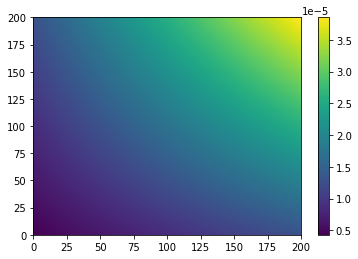

In [62]:
hM = heatMap(10,30,200)
plt.pcolor(hM)
plt.colorbar()

48 58 54 61 46 63 64 91


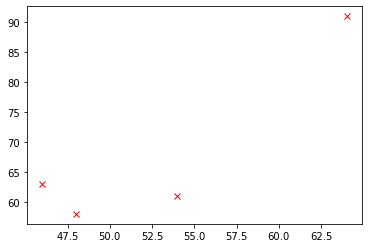

In [76]:
x1,y1 = intersection1(dx,dy,alpha)
x2,y2 = intersection2(dx,dy,alpha)
x3,y3 = intersection3(dx,dy,alpha)
x4,y4 = intersection4(dx,dy,alpha)
x = np.linspace(-20,20,100)
yL1 = 2.8*x
yL2 = -2.8*x
yL3 = 1/np.tan((alpha-15.75)*np.pi/180)*(x-dx)+dy
yL4 = 1/np.tan((alpha+15.75)*np.pi/180)*(x-dx)+dy

x1 = int(x1)+off
x2 = int(x2)+off
x3 = int(x3)+off
x4 = int(x4)+off
y1 = int(y1)+off
y2 = int(y2)+off
y3 = int(y3)+off
y4 = int(y4)+off
print(x1,y1,x2,y2,x3,y3,x4,y4)

# plt.figure(figsize=(20,20))
plt.plot([x1,x2,x3,x4],[y1,y2,y3,y4],'rx')

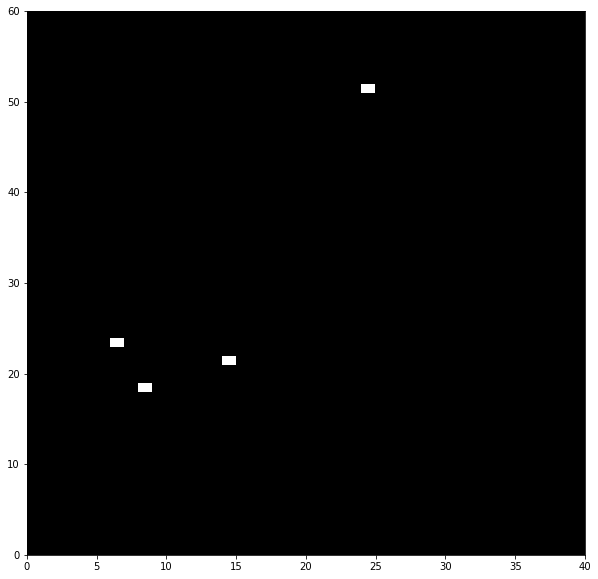

In [114]:
hM = np.zeros((100,100))
hM[x1][y1] = 255
hM[x2][y2] = 255
hM[x3][y3] = 255
hM[x4][y4] = 255

xC1= xC1-40
xC2= xC2-40
yC1= yC1-40
yC2= yC2-40
hM = hM.T[40:100,40:80]
plt.figure(figsize=(10,10)) 
plt.pcolor(hM,cmap='gray')

# for i in 

In [121]:
plt.figure(figsize=(10,10)) 
for i in range(60):
    for j in range(40):
        if(j>=0.5*i+14 and j>=-2.5*i+38 and j<=3*i-21 and j<=14/9*i+41/3):
            plt.plot(i,j,'rx')
            hM[i][j] = heat(dist(i,j,yC1,xC1),dist(i,j,yC2,xC2))
            plt.pcolor(hM)
        else:
            hM[i][j] = 0

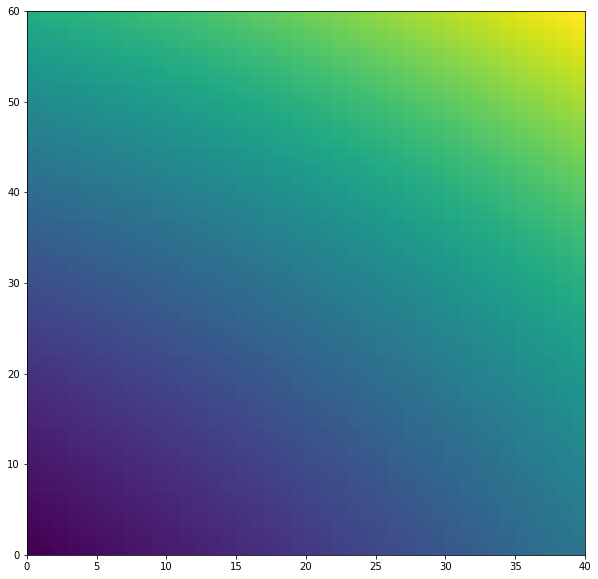

In [122]:
plt.figure(figsize=(10,10)) 
plt.pcolor(hM)